# Statistics: The Science of Decisions Project
## Testing a Perceptual Phenomenon

#### Prepared by: 
Jeff Daniels  
jeffrey.arthur.daniels@gmail.com  
August 14th, 2017

### Background Information

The Stroop effect measures the interference in reaction time during a task where participants identify the color of written text.  The color of the text can be arbitrarily assigned: for example <b><font color = purple>CAT</font></b>, <b><font color = aqua>DOG</font></b>, <b><font color = lime>MOUSE</font></b>.  The text color can also be congruent words where the words are names of colors printed in colors that correspond to their names: for example <b><font color = "black">BLACK</font></b>, <b><font color ="blue">BLUE</font></b>, <b><font color = "red">RED</font></b>.  Examples of incongruent words, where the words are names of colors printed in colors that do not correspond: <b><font color = "fuchsia">GREEN</font></b>, <b><font color = "orange">PINK</font></b>, <b><font color = "green">ORANGE</font></b>.

This test data is concerned with the diffence in reaction times for identifying two sets of words, a congruent set and an incongruent set.  Both sets of words are the names of colors and are the same length, but the congruent words are printed in colors that corespond to the name of the color.  The time it takes to identify the word colors in each set is recorded.

The purpose of this test is to determine if there is a difference in time it takes to identify congruent and incongruent words.

### Question 1: Identify variables in the experiment

The independent variable which this test modifies is whether the word set contains congruent words or incongruent words.  These seperate inputs could influence the amount of time it takes to complete the task of identifying a list of words, the dependent variable.  The length of each list of words is constant.  Because participants are identifying a set of both types of words, the amount of samples for each type of word set is also equal.

### Question 2a: Establish hypotheses

The null hypothesis for this experiment is that the type of words in each set does not affect the time it takes to complete the task of identifying word colors.  For our data, this means that the mean time to task completion is the same for congruent and incongruent word sets.

<center>$H_0:$  $\mu_{Con}$ = $\mu_{Inc}$</center>

Where $H_0$ is the null hypothesis, $\mu_{Con}$ is the mean time to complete a Congruent word set, and $\mu_{Inc}$ is the mean time to complete an Incongruent word set.

The alternative hypothesis $H_A$ will predict the mean time to complete the tasks to be different.  Either the time to complete the congruent word set is *greater* than the time to complete the incongruent task or it is *less*.

<center>$H_A:$  $\mu_{Con}$ > $\mu_{Inc}$</center>

<center>$or$</center>

<center>$H_A:$  $\mu_{Con}$ < $\mu_{Inc}$</center>


### Question 2b: Establish a statistical test

The data represents samples from a population of test takers.  The two sets of data are paired samples because they represent a sample of test takers who took two tests.  Furthermore, because we are interested in the difference in means between the two tests, $\bar{X}_D$, a Paired difference test should be used.  

To be certain that the difference in paired samples represents an actual difference in test scores for the entire population and not just variability in samples taken, a statistical test must be implemented.  Generally speaking, for two sample means to be statistically different, the likelihood of the mean difference $\bar{X}_D$, must be below some threshold $\alpha$.  

<center>$p$($\bar{X}_D$) < $\alpha$</center>

Several methods can be used to implement paired difference tests but I shall compare the two commonly used methods for $\bar{X}_D$ that is assumed to have a normal distribution, the t-test and the z-test.  The major difference between the two being: the <i>population</i> standard deviation $\sigma_D$ is known in the z-test.  Practically speaking, the t-test is used when the sample size $n$ < 30.

The t-statistic is as follows: 

\begin{equation*}
t = \frac{\bar{X}_D}{\frac{s_D}{\sqrt{n}}}
\end{equation*}
    

Where $\bar{X}_D$ is the mean of differences between the test scores,$\ s_D$ is the sample standard deviation of the test score differences, and$\ n$ is the number of test takers or samples for each test.  

The t-statistic and degrees of freedom $v$ will be the inputs for calculating the probability of the $t$ value in the Student t-distribution written below.

\begin{equation}
p = \frac{\Gamma(\frac{v+1}{2})}{\sqrt{v\pi}\Gamma(\frac{v}{2})}\Big(1+\frac{t^2}{v}\Big)^{-\frac{v+1}{2}}
\end{equation}  

Where $v$ is the degrees of freedom:  

<center>$v$ = $n-1$</center>

And $\Gamma$ is the gamma function:

<center>$\Gamma$$(n) = (n-1)!$</center>

An explanation of the t-student distribution is beyond my understanding and the scope of this test.  For this test, a python function from the stats library was used to return a t-statistic and a two-tailed p-value:

stats.ttest_rel(a, b, axis=0)

Which according to the documentation:

*Calculates the t-test on two related samples of scores, a and b.  This is a two-sided test for for the null hypothesis that 2 related or repeated samples have identical average (expected) values.*  

To summarize, the t-test will generate a t-statistic $t$ for the mean difference $\bar{X}_D$ of two test sets and the probability $p$ of that value.  If the probability is below a threshold $\alpha$, the null hypothesis $H_0$ is rejected.  

\begin{equation}
Accept \, H_0: \quad p\Big(t(\bar{X}_D)\Big) > \alpha
\end{equation}

\begin{equation}
Reject \, H_0: \quad p\Big(t(\bar{X}_D)\Big) \leq \alpha
\end{equation}

Setting $\alpha$ to a reasonable threshold:

\begin{equation}
\alpha = 0.05
\end{equation}

The null hypothosis $H_0$ shall be rejected if the p-value is at or below 0.05:

\begin{equation}
p \leq 0.05
\end{equation}

Assuming a two tailed distribution, this probability corresponds to critical t-statistic $t_{Crit}$ of 2.07 and we can therefore accept or reject the null hypothesis $H_0$ under the following conditions:

\begin{equation}
Accept \, H_0: \quad t < 2.07
\end{equation}

\begin{equation}
Reject \, H_0: \quad t \geq 2.07
\end{equation}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats

stroop = pd.read_csv('stroopdata.csv')


In [5]:
# Summary of Data

stroop.describe();

In [114]:
# Calculate XbarD

stroop.Difference = stroop.Incongruent - stroop.Congruent
stroop.Difference.describe();

In [115]:
# Calculate t_crit for two-tailed t-distribution
df = stroop.Difference.size - 1
alpha = 0.05

stats.t.ppf(1-alpha/2, df);

In [116]:
# Percent increase in task completion times

(stroop.Incongruent.mean() - stroop.Congruent.mean())/(stroop.Congruent.mean());

### Question 3: Report Descriptive Statistics

The table below reports the descriptive statistics for the data set.  Clearly it takes longer to identify colors in an incongruent data set.  About 57% longer.  The average difference in time, $\bar{X}_D$, is 7.96 seconds.

|  Time to Complete task (s)               |
|---:|
|       | $X_{Con}$ |$X_{Inc}$ | $X_D$     |
|n  |24        |24          | 24 |
|$\bar{X}$   |14.05     |22.02       | 7.96 |
|$s$ | 3.56 | 4.80 | 4.86 |


### Question 4: Plot the data

A histogram of the two groups of data are plotted below.  Now we can see visually how the time it takes to complete an incongruent task is generally longer than for a congruent task.  Plotting the normal probability distribution function over the histogram also helps us to visualize the greater variability in the incongruent task.  The test scores overlap between about 15 and 22 seconds.

While this plot shows the distributions of test scores well, it does not tell us whether or not specific individuals did better or worse on an incongruent task.  This plot could be interpreted as so: the overlap region of the histograms represents individuals for whom the null hypothesis applies, those who did not perform the incongruent task slower or faster.  There may still be individuals who performed incongruent tasks faster.

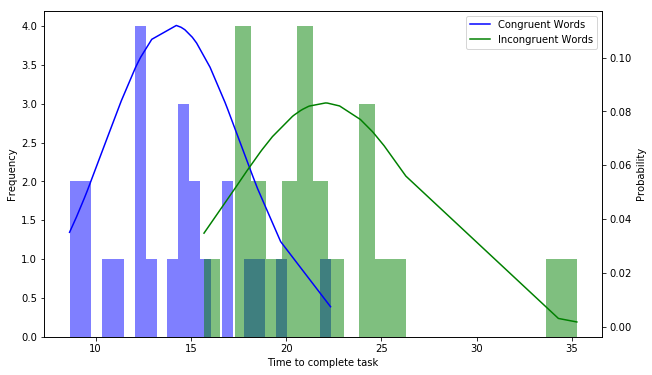

In [117]:
# Plot the histograms of the two tests
# Overlay a probability distribution function

%matplotlib inline

fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()

ax1.hist(stroop.Congruent, bins = 24, color = 'b', alpha = 0.5)
ax1.hist(stroop.Incongruent, bins = 24, color = 'g', alpha = 0.5)
congruent_fit = stats.norm.pdf(sorted(stroop.Congruent), 
                               stroop.Congruent.mean(), 
                               stroop.Congruent.std())
incongruent_fit = stats.norm.pdf(sorted(stroop.Incongruent),
                                 stroop.Incongruent.mean(), 
                                 stroop.Incongruent.std())
ax2.plot(sorted(stroop.Congruent), congruent_fit,
        color = 'b')
ax2.plot(sorted(stroop.Incongruent), incongruent_fit,
        color = 'g')


ax1.set_ylabel('Frequency')
ax2.set_ylabel('Probability')
ax1.set_xlabel('Time to complete task')
plt.legend(['Congruent Words', 'Incongruent Words'])

plt.show()

Plotted below is the difference in time between the incongruent and congruent tasks for each test subject.  Now we can be certain that in our data set there were no test subjects who performed faster on the incongruent task.  The t-statistic probability density function is plotted over the histogram and it appears that it is extremely unlikely that someone will complete an incongruent task faster:

\begin{equation}
p(\bar{X}_D < 0) = 2.31 x 10^{-8}
\end{equation}

In [118]:
# Likelihood of completing the incongruent task faster - normal distribution

stats.norm.cdf(0, stroop.Difference.mean(), stroop.Difference.std());

In [119]:
# Likelihood of completing the incongruent task faster -t distribution

df = stroop.Difference.size - 1
stats.t.cdf(0, df, stroop.Difference.mean());

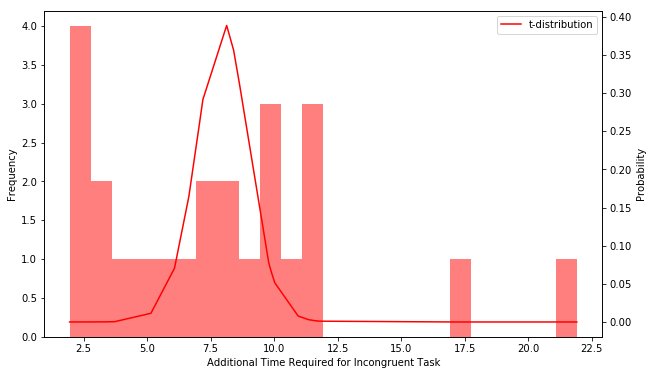

In [120]:
# Plot a histogram of differences
# Overlay the t distribution function

df = stroop.Difference.size - 1
fig, ax1 = plt.subplots(figsize = (10,6))
ax2 = ax1.twinx()

ax1.hist(stroop.Difference, bins = 24, color = 'r', alpha = 0.5)

#difference_fit = stats.norm.pdf(sorted(stroop.Difference), 
#                               stroop.Difference.mean(), 
#                               stroop.Difference.std())

t_dist_fit = stats.t.pdf(sorted(stroop.Difference), df,
                    stroop.Difference.mean())

ax2.plot(sorted(stroop.Difference), t_dist_fit,
        color = 'r')

ax1.set_ylabel('Frequency')
ax2.set_ylabel('Probability')
ax1.set_xlabel('Additional Time Required for Incongruent Task')

plt.legend(['t-distribution'])
plt.show()

In [121]:
# Dependent t-test for paired samples
stats.ttest_rel(stroop.Congruent, stroop.Incongruent);

### Question 5: Perform the statistical test and interpret your results

Let us revisit our conditions for accepting or rejecting the null hypothesis based on the $t_{Crit}$ value corresponding to $\alpha$ = 0.05 and degrees of freedom equal to 23:  

\begin{equation}
Accept \, H_0: \quad t < 2.07
\end{equation}

\begin{equation}
Reject \, H_0: \quad t \geq 2.07
\end{equation}

Performing a t-test on $\bar{X}_D$ gave us the following results:

\begin{equation}
t(\bar{X}_D) = 8.02
\end{equation}

\begin{equation}
t(\bar{X}_D) > t_{crit}
\end{equation}

Therefore <b><i>the null hypothesis is rejected</i></b>.  The probability of this difference in test scores without rejecting the null hypothesis is very low.

\begin{equation}
p(\bar{X}_D) = 4.1*10^{-8}
\end{equation}

\begin{equation}
p(\bar{X}_D) < \alpha
\end{equation}

Recall that mean difference in test scores $\bar{X}_D$ is $7.96$.  Setting our confidence interval $CI$ to $95 \%$, the $t_{Crit}$ values for this confidence interval are $\pm 2.07$.  That is:

\begin{equation}
p(-2.07 < t < 2.07) = 0.95
\end{equation}

Substituting for $t$:

\begin{equation}
p(-2.07 < \frac{\bar{X}_D}{\frac{s_D}{\sqrt{n}}} < 2.07) = 0.95
\end{equation}

Solving for $\bar{X}_D$ generates our equation for a confidence interval:
\begin{equation}
\bar{X}_D \pm 2.07*\frac{s_D}{\sqrt{n}}
\end{equation}

The margin of error is calculated to be $2.05$
\begin{equation}
Margin \, of \, Error = 2.07*\frac{s_D}{\sqrt{n}} = 2.05
\end{equation}


and the confidence interval is:  


<center><b> 95% CI [5.91, 10.01] </b></center>

Based on the t-test, the null hypothesis is rejected.  Furthermore we can can state with 95% confidence that it will take between 5.91 and 10.01 seconds longer to complete an incongruent task than a congruent task.

In [122]:
# Confidence Interval calculations go here
n = stroop.Difference.size
df = n-1
CI = 0.95
t_crit = stats.t.ppf((1-CI)/2, df)
std_error = stroop.Difference.std()/np.sqrt(n)

margin_of_error = t_crit * std_error
margin_of_error;

In [123]:
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')